In [47]:
# Why did the 2D 2013 run get stuck?
# Maybe just a fluke. Limiting cell was on proc 22,
# maybe at the wetting front on the N side of the lagoon.
# Goes awry by map output step 8
# seaward side of proc22 goes to eta=1e12
# Nothing awry in history output

In [26]:
from stompy.grid import unstructured_grid, multi_ugrid
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4
%matplotlib notebook

In [4]:
# mu=multi_ugrid.MultiUgrid('data_2013-2d-v00/DFM_OUTPUT_flowfm/*map.nc')

In [31]:
# proc 22 is the culprit
for proc in range(32):
    ds=netCDF4.Dataset(f'data_2013-2d-v00/DFM_OUTPUT_flowfm/flowfm_{proc:04d}_map.nc',
                      mode='r')
    max_lim=max(ds['mesh2d_Numlimdt'][-1,:])
    print(f"proc {proc}: max num lim dt {max_lim}")
    ds.close()

/home/rustyh/miniconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


proc 8: max num lim dt 0.0
proc 9: max num lim dt 0.0
proc 10: max num lim dt 1.0
proc 11: max num lim dt 0.0
proc 12: max num lim dt 0.0
proc 13: max num lim dt 0.0
proc 14: max num lim dt 0.0
proc 15: max num lim dt 0.0
proc 16: max num lim dt 0.0
proc 17: max num lim dt 0.0
proc 18: max num lim dt 0.0
proc 19: max num lim dt 1.0
proc 20: max num lim dt 0.0
proc 21: max num lim dt 0.0
proc 22: max num lim dt 254221.0
proc 23: max num lim dt 1.0
proc 24: max num lim dt 0.0
proc 25: max num lim dt 0.0
proc 26: max num lim dt 0.0
proc 27: max num lim dt 0.0
proc 28: max num lim dt 0.0
proc 29: max num lim dt 0.0
proc 30: max num lim dt 0.0
proc 31: max num lim dt 0.0


In [35]:
proc=22
ds=xr.open_dataset(f'data_2013-2d-v00/DFM_OUTPUT_flowfm/flowfm_{proc:04d}_map.nc')

In [36]:
g=unstructured_grid.UnstructuredGrid.read_ugrid(ds)

<IPython.core.display.Javascript object>


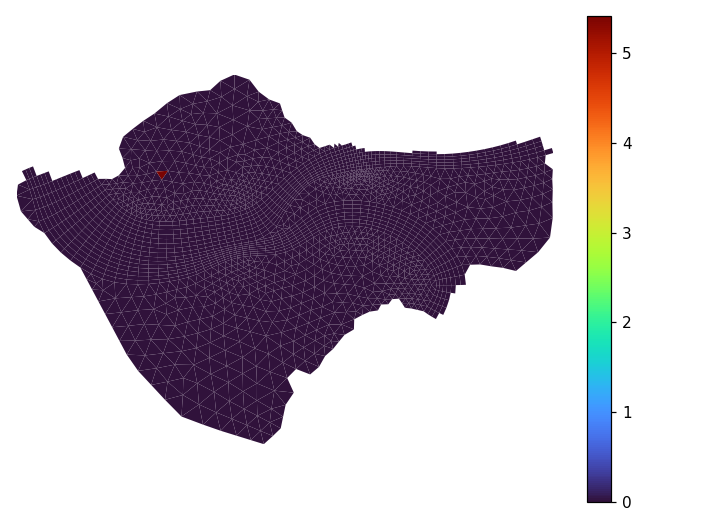

In [37]:
fig,ax=plt.subplots()
ccoll=g.plot_cells(values=np.log10(ds['mesh2d_Numlimdt'].isel(time=-1).values.clip(1)),
                   cmap='turbo')
plt.colorbar(ccoll)
ax.axis('off')
fig.tight_layout()

<IPython.core.display.Javascript object>


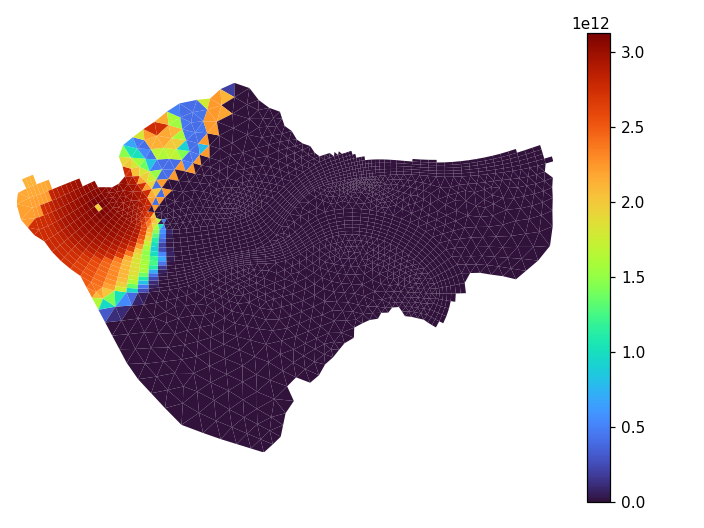

In [46]:
fig,ax=plt.subplots()
ccoll=g.plot_cells(values=ds['mesh2d_s1'].isel(time=8).values,
                   cmap='turbo')
plt.colorbar(ccoll)
ax.axis('off')
fig.tight_layout()

In [48]:
his_ds=xr.open_dataset('data_2013-2d-v00/DFM_OUTPUT_flowfm/flowfm_0000_his.nc')

<IPython.core.display.Javascript object>


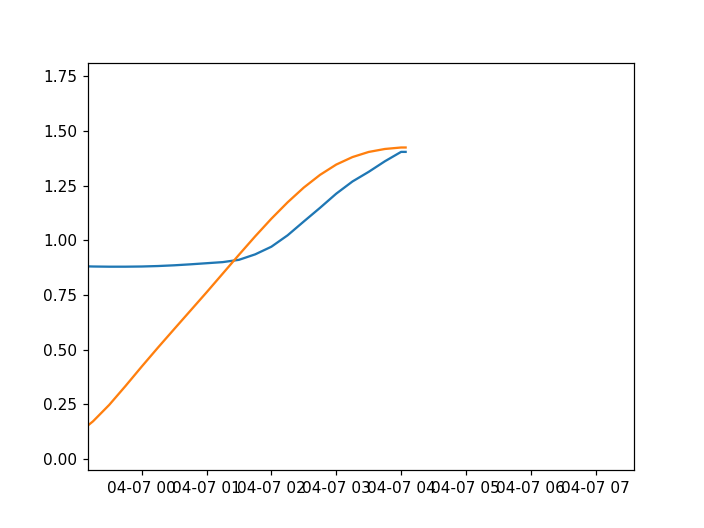

/home/rustyh/miniconda3/envs/general/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [53]:
etaA=his_ds.waterlevel.isel(stations=-2)
etaB=his_ds.waterlevel.isel(stations=-1)
plt.figure()
plt.plot(his_ds.time, etaA)
plt.plot(his_ds.time, etaB)

In [62]:
etaA[-1]

<xarray.DataArray 'waterlevel' ()>
array(1.404608)
Coordinates:
    station_x_coordinate  float64 ...
    station_y_coordinate  float64 ...
    station_name          |S64 b'seepageA'
    time                  datetime64[ns] 2013-04-07T04:04:12.476394960
Attributes:
    standard_name:  sea_surface_height
    long_name:      water level
    units:          m
    geometry:       station_geom

In [67]:
his_ds.waterlevel.time.max()

<xarray.DataArray 'time' ()>
array('2013-04-07T04:04:12.476394960', dtype='datetime64[ns]')

In [68]:
ds.time.max()

<xarray.DataArray 'time' ()>
array(1397052.47639496)

In [71]:
ds2=xr.decode_cf(ds)

In [72]:
ds2.time.max()

<xarray.DataArray 'time' ()>
array('2013-04-07T04:04:12.476394960', dtype='datetime64[ns]')

In [ ]:
# makes no sense.s1 looks crazy, but history file shows nothing weird.
# they both claim to have output at the same time.
HERE - wtf?
